# So you want to play with simulated PACE OCI data? Follow along to learn how!

### This notebook is designed for a novice Python user to download, open, and plot simulated hyperspectral OCI. <br> These same methods can be used to analyze real PACE OCI data after launch. 

# Step 1: Downloading PACE data

- The PACE science data are processed from Level-0 raw data packets to higher-level products following standard definitions of the NASA Earth Science Data Systems (ESDS) Program: https://www.earthdata.nasa.gov/engage/open-data-services-and-software/data-information-policy/data-levels
- All data products above Level-0 are distributed in Network Common Data Form, version 4 (netcdf4), and follow ESDS file structure and meta-data standards. 
- The NASA Ocean Biology Processing Group (OBPG) File Naming Convention can be found here: https://oceancolor.gsfc.nasa.gov/resources/docs/filenaming-convention/

#### We will be using Level-2 products, which follow the general format as described here: https://oceancolor.gsfc.nasa.gov/resources/docs/format/l2nc/ 

### Download PACE data from: https://oceancolor.gsfc.nasa.gov/data/pace/test-data/. <br> After selecting 'Level-2', select '2022/', then '21 Mar 2022 (080)' <br> Select 


# Step 2: Read in data using netcdf4
#### netCDF4 is a Python interface to the netCDF C library. More info can be found here: https://unidata.github.io/netcdf4-python/

In [1]:
#First, we will read in dependencies
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [3]:
df.metadata

type: name 'df' is not defined

In [81]:
#df = nc.Dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc')
df = nc.Dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.DITL.nc')
#df = nc.Dataset('/Users/awindled/Documents/Simulated_OCI_data/AQUA_MODIS.20201130T203000.L2.OC.nc')

print(df) #with netcdf, we see the groups at the bottom of the dataset readout
print('')

df_sen = df.groups['sensor_band_parameters']
print(df_sen)
print('')

df_geo = df.groups['geophysical_data']
print(df_geo) #select the geophysical_data group and print all variables
print('')

df_nav = df.groups['navigation_data']
print(df_nav) #select the geophysical_data group and print all variables
print('')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: OCIS Level-2 Data
    product_name: PACE_OCI_SIM.20220321T165218.L2.OC_AOP.DITL.nc
    processing_version: DITL
    orbit_number: 12345
    history: l2gen par=/data11/sdpsoper/vdc/vpu10/workbuf/PACE_OCI_SIM.20220321T165218.L1B.V9.1.nc.param metafile=PACE_OCI_SIM.20220321T165218.L2.OC_AOP.DITL.nc.meta
    instrument: OCIS
    platform: PACE
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: DITL/L2/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.DITL.nc
    date_created: 2023-09-11T22:47:48.000Z
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Laboratory, Ocean Biology Processing Group
    creator_name: NASA/GSFC/OBPG
    creator_email: data@oceancolor.gsfc.nasa.gov
    creator_url: https://ocea

## Alternative method: Read in data using Xarray

#### Xarray is a python package for working with labeled multi-dimensional arrays and includes functions for advanced analytics and visualization. <br> More info can be found here: https://xarray.dev/ 

*Note: Xarray requires you to specify group when opening a file using `open_dataset`*


In [2]:
#remove these quotes before and after the code to run 

df = xr.open_dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc')
print(df) #With xarray, groups do not automatically show, so we have to add group = 'geophysical_data' at the end
print('')

df_geo = xr.open_dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc', group='geophysical_data')
print(df_geo) #print all variables in 'geophysical_data' variable
print('')

df_nav = xr.open_dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc', group='navigation_data')
print(df_nav)
print('')

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/44)
    title:                          OCIS Level-2 Data
    product_name:                   PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9...
    processing_version:             V9.1
    orbit_number:                   12345
    history:                        l2gen par=/data5/sdpsoper/vdc/vpu4/workbu...
    instrument:                     OCIS
    ...                             ...
    geospatial_lon_max:             -74.67567
    geospatial_lon_min:             -50.547752
    startDirection:                 Ascending
    endDirection:                   Ascending
    day_night_flag:                 Day
    earth_sun_distance_correction:  1.0076725482940674

<xarray.Dataset>
Dimensions:   (number_of_lines: 1720, pixels_per_line: 1272, wavelength_3d: 153)
Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
Data variables:
    Rrs       (number_of_lines, pixels_per_line, wavelength_3d) 

## Step 3: Spatially plot one wavelength of Rrs
#### The Rrs variable is a multidimensional array containing 1720 rows, 1272 columns, and 153 wavelengths. <br> Let's plot the 100th wavelength

##### We are using the matplotlib library for visualizations: https://matplotlib.org/

In [3]:
#Let's look at the shape of the Rrs array
df_geo['Rrs'].shape

(1720, 1272, 153)

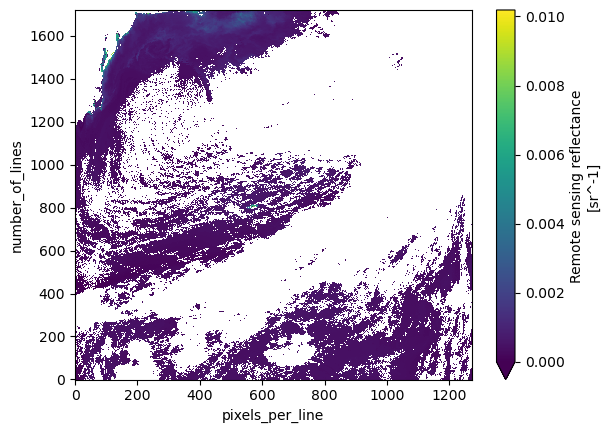

In [4]:
#We are indexing the Rrs variable and telling it to plot all the rows, all the columns, and just the 100th wavelength
df_geo['Rrs'][:,:,100].plot(cmap='viridis', vmin=0) #see https://matplotlib.org/stable/tutorials/colors/colormaps.html for other colormaps

### Right now, it is plotting using number_of_lines and pixels_per_line (x,y). Let's add some lat and lon values. <br> To do this, we need to create a new xarrray dataset and pull in information from the navigational_data dataset (df_nav)

In [5]:
#declare lat and lon values from df_nav 
lat = df_nav.variables['latitude'][:]
lon = df_nav.variables['longitude'][:]

#create new xarray dataset with lats, lons
rrs_xds = xr.Dataset({'Rrs':(('x', 'y', 'z'),df_geo.variables['Rrs'][:].data)},
                    coords = {'lat': (('x', 'y'), lat),
                              'lon': (('x', 'y'), lon)},
                    attrs={'variable':'Remote sensing reflectance'})
rrs_xds

<xarray.Dataset>
Dimensions:  (x: 1720, y: 1272, z: 153)
Coordinates:
    lat      (x, y) float32 21.38 21.39 21.4 21.42 ... 44.4 44.4 44.41 44.42
    lon      (x, y) float32 -74.68 -74.61 -74.54 -74.48 ... -50.72 -50.64 -50.55
Dimensions without coordinates: x, y, z
Data variables:
    Rrs      (x, y, z) float32 0.009564 0.005728 0.003878 ... nan nan nan
Attributes:
    variable:  Remote sensing reflectance

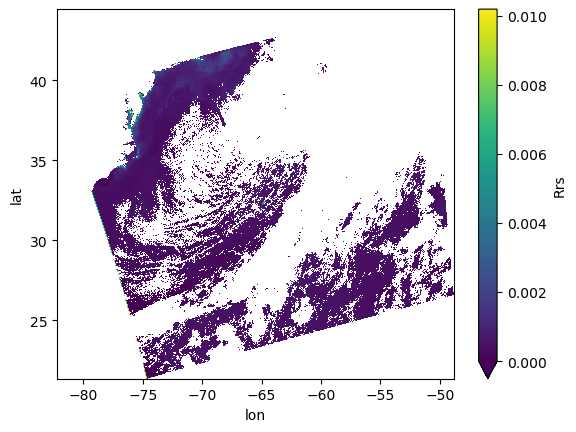

In [6]:
#We are indexing the Rrs variable and telling it to plot all the lats, lons, and the 100th wavelength
rrs_xds.Rrs[:,:,100].plot(x='lon', y='lat', cmap='viridis', vmin=0)

### Let's zoom into an area of interest- the Chesapeake Bay

In [7]:
rrs_xds_subset = rrs_xds.where((rrs_xds.lat>=34) & (rrs_xds.lat<=40), drop=True)
rrs_xds_subset = rrs_xds_subset.where((rrs_xds_subset.lon>=-77) & (rrs_xds_subset.lon<=-74), drop=True)

rrs_xds_subset

<xarray.Dataset>
Dimensions:  (x: 1006, y: 193, z: 153)
Coordinates:
    lat      (x, y) float32 28.72 28.74 28.75 28.77 ... 40.64 40.65 40.65 40.66
    lon      (x, y) float32 -76.95 -76.89 -76.82 -76.76 ... -74.07 -74.05 -74.02
Dimensions without coordinates: x, y, z
Data variables:
    Rrs      (x, y, z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    variable:  Remote sensing reflectance

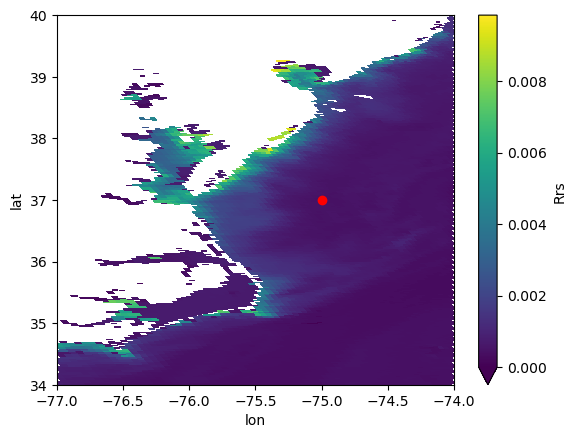

In [8]:
rrs_xds_subset.Rrs[:,:,100].plot(x='lon', y='lat', cmap='viridis', vmin=0)
plt.axis([-77, -74, 34, 40]) #changes the plotting axes
plt.plot(-75,37, marker='o',color='red') #adding red point to extract data from (see below)

## Step 4: Plot a hyperspectral Rrs spectrum from one pixel (red point on above plot)

### Let's extract all data from one pixel located near (37, -75)

In [26]:
#rrs_xds_point = rrs_xds.Rrs.sel(rrs_xds.x==1000, rrs_xds.y==500, method='nearest') #, drop=True)
#rrs_xds_point

rrs_xds_point = rrs_xds.sel(x=1000, y=90)
rrs_xds_point

<xarray.Dataset>
Dimensions:  (z: 153)
Coordinates:
    lat      float32 32.56
    lon      float32 -74.1
Dimensions without coordinates: z
Data variables:
    Rrs      (z) float32 0.000634 0.000844 0.00098 ... 5e-05 -3.4e-05 -0.000172
Attributes:
    variable:  Remote sensing reflectance

In [10]:
wv = rrs_xds.z #[0:114]
wv

<xarray.DataArray 'z' (z: 153)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152])
Dimensions without coordinates: z

In [11]:
import numpy as np
wavelength_3d = np.array([340, 343, 345, 348, 350, 353, 355, 358, 360, 363, 365,
      368, 370, 373, 375, 378, 380, 383, 385, 388, 390, 393, 395, 398, 400,
      403, 405, 408, 410, 413, 415, 418, 420, 423, 425, 428, 430, 433, 435,
      438, 440, 443, 445, 448, 450, 453, 455, 458, 460, 463, 465, 468, 470,
      473, 475, 478, 480, 483, 485, 488, 490, 493, 495, 498, 500, 503, 505,
      508, 510, 513, 515, 518, 520, 523, 525, 528, 530, 533, 535, 538, 540,
      543, 545, 548, 550, 553, 555, 558, 560, 563, 565, 568, 570, 573, 575,
      578, 580, 583, 585, 588, 590, 593, 595, 598, 600, 603, 605, 608, 610,
      613, 615, 618, 620, 623, 625, 628, 630, 633, 635, 638, 640, 643, 645,
      648, 650, 653, 655, 658, 660, 663, 665, 668, 670, 673, 675, 678, 680,
      683, 685, 688, 690, 693, 695, 698, 700, 703, 705, 708, 710, 713, 715,
      718, 720])
wavelength_3d

array([340, 343, 345, 348, 350, 353, 355, 358, 360, 363, 365, 368, 370,
       373, 375, 378, 380, 383, 385, 388, 390, 393, 395, 398, 400, 403,
       405, 408, 410, 413, 415, 418, 420, 423, 425, 428, 430, 433, 435,
       438, 440, 443, 445, 448, 450, 453, 455, 458, 460, 463, 465, 468,
       470, 473, 475, 478, 480, 483, 485, 488, 490, 493, 495, 498, 500,
       503, 505, 508, 510, 513, 515, 518, 520, 523, 525, 528, 530, 533,
       535, 538, 540, 543, 545, 548, 550, 553, 555, 558, 560, 563, 565,
       568, 570, 573, 575, 578, 580, 583, 585, 588, 590, 593, 595, 598,
       600, 603, 605, 608, 610, 613, 615, 618, 620, 623, 625, 628, 630,
       633, 635, 638, 640, 643, 645, 648, 650, 653, 655, 658, 660, 663,
       665, 668, 670, 673, 675, 678, 680, 683, 685, 688, 690, 693, 695,
       698, 700, 703, 705, 708, 710, 713, 715, 718, 720])

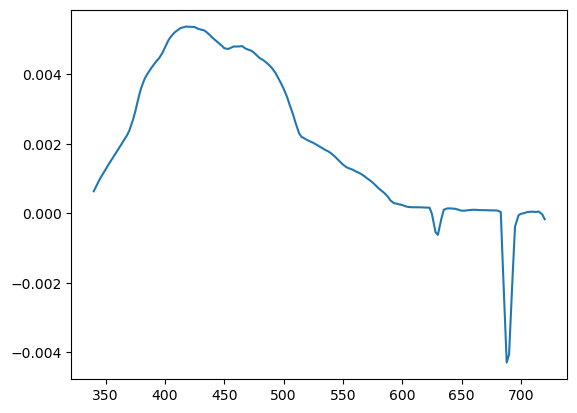

In [27]:
plt.plot(wavelength_3d, rrs_xds_point.Rrs)

In [33]:
wavelength_3d[140]

690

In [32]:
rrs_xds_point.Rrs[140]

<xarray.DataArray 'Rrs' ()>
array(-0.004064, dtype=float32)
Coordinates:
    lat      float32 32.56
    lon      float32 -74.1

In [36]:
iop = nc.Dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_IOP.V9.1.nc')
iop

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: OCIS Level-2 Data
    product_name: PACE_OCI_SIM.20220321T165218.L2.OC_IOP.V9.1.nc
    processing_version: V9.1
    orbit_number: 12345
    history: l2gen par=/data7/sdpsoper/vdc/vpu6/workbuf/PACE_OCI_SIM.20220321T165218.L1B.V9.1.nc.param metafile=PACE_OCI_SIM.20220321T165218.L2.OC_IOP.V9.1.nc.meta
    instrument: OCIS
    platform: PACE
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: V9.1/L2/PACE_OCI_SIM.20220321T165218.L2.OC_IOP.V9.1.nc
    date_created: 2023-06-06T15:01:43.000Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Optics > Reflectance
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Labor

In [37]:
iop = xr.open_dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_IOP.V9.1.nc', group='geophysical_data')
iop

<xarray.Dataset>
Dimensions:      (number_of_lines: 1720, pixels_per_line: 1272)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/33)
    a_413        (number_of_lines, pixels_per_line) float32 ...
    a_443        (number_of_lines, pixels_per_line) float32 ...
    a_490        (number_of_lines, pixels_per_line) float32 ...
    a_510        (number_of_lines, pixels_per_line) float32 ...
    a_555        (number_of_lines, pixels_per_line) float32 ...
    a_670        (number_of_lines, pixels_per_line) float32 ...
    ...           ...
    Kd_443_lee   (number_of_lines, pixels_per_line) float32 ...
    Kd_490_lee   (number_of_lines, pixels_per_line) float32 ...
    Kd_510_lee   (number_of_lines, pixels_per_line) float32 ...
    Kd_555_lee   (number_of_lines, pixels_per_line) float32 ...
    Kd_670_lee   (number_of_lines, pixels_per_line) float32 ...
    l2_flags     (number_of_lines, pixels_per_line) int32 ...

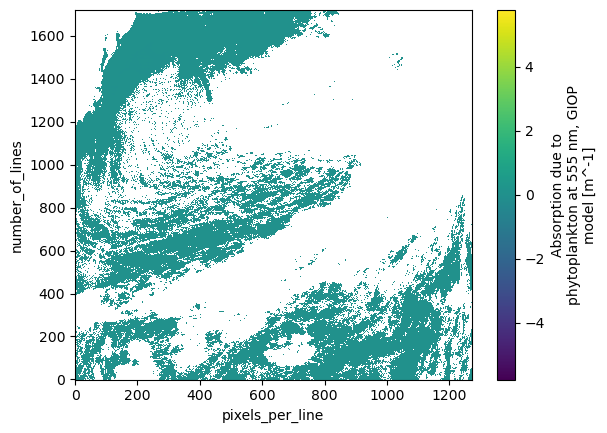

In [38]:
iop['aph_555'].plot(cmap='viridis')